In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import collections
import datetime

from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [4]:
data['DateTime'] = pd.to_datetime(data['DateTime'])

In [5]:
data['Outcomedate'] = data['DateTime'].dt.date

In [6]:
data['OutcomeHour'] = data['DateTime'].dt.hour

In [7]:
data['OutcomeWeekday'] = data['DateTime'].dt.weekday

In [8]:
def catAge(x):
    if x in [5,6,7,8,9,10,11,12]:
        return 'morning'
    elif x in [13,14,15,16,17]:
        return 'Afternoon'
    elif x in [18,19,20,21]:
        return 'Evening'
    elif x in [22,23,24,0,1,2,3,4]:
        return 'Night'

data['OutcomeDay'] = data['OutcomeHour'].apply(catAge)

In [9]:
data['OutcomeType'].value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

we know that data is unbelance

# EDA 

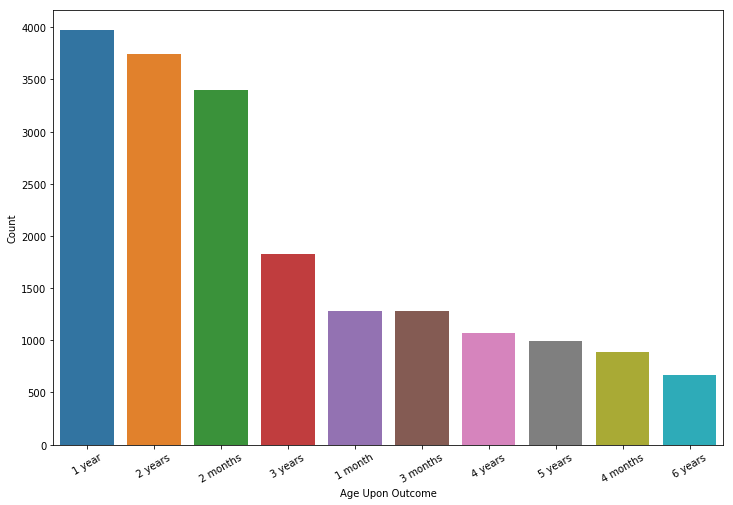

In [10]:
age_upon_outcome = data['AgeuponOutcome'].value_counts().head(10)
plt.figure(figsize=(12,8))
_ = sns.barplot(age_upon_outcome.index, age_upon_outcome.values)
plt.xlabel("Age Upon Outcome")
plt.ylabel("Count")
for item in _.get_xticklabels():
    item.set_rotation(30)
plt.show()

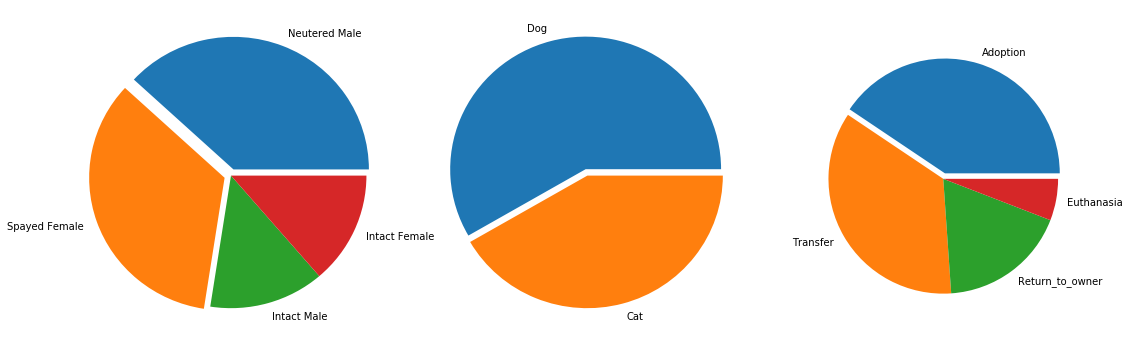

In [11]:
f, axes = plt.subplots(1, 3, figsize = (15,5))
plt.subplots_adjust(wspace = 0.5)
animal_type = data['AnimalType'].value_counts().head(4)
sex_upon_intake = data['OutcomeType'].value_counts().head(4)
Out_come_Type = data['SexuponOutcome'].value_counts().head(4)
explode0 = (0.05,0)
explode1 = [0.05, 0, 0, 0]
explode2 = [0.05, 0.05, 0, 0]
# explode 1st slice
# Plot
axes[1].pie(animal_type.values, explode=explode0, labels=animal_type.index)
plt.axis('equal')
# Plot1
axes[2].pie(sex_upon_intake.values, explode=explode1, labels=sex_upon_intake.index)
plt.axis('equal')
# Plot2
axes[0].pie(Out_come_Type.values,explode=explode2,labels=Out_come_Type.index)
plt.axis('equal')
plt.tight_layout()
plt.show()

Text(0.5,1,'Dog - Outcome')

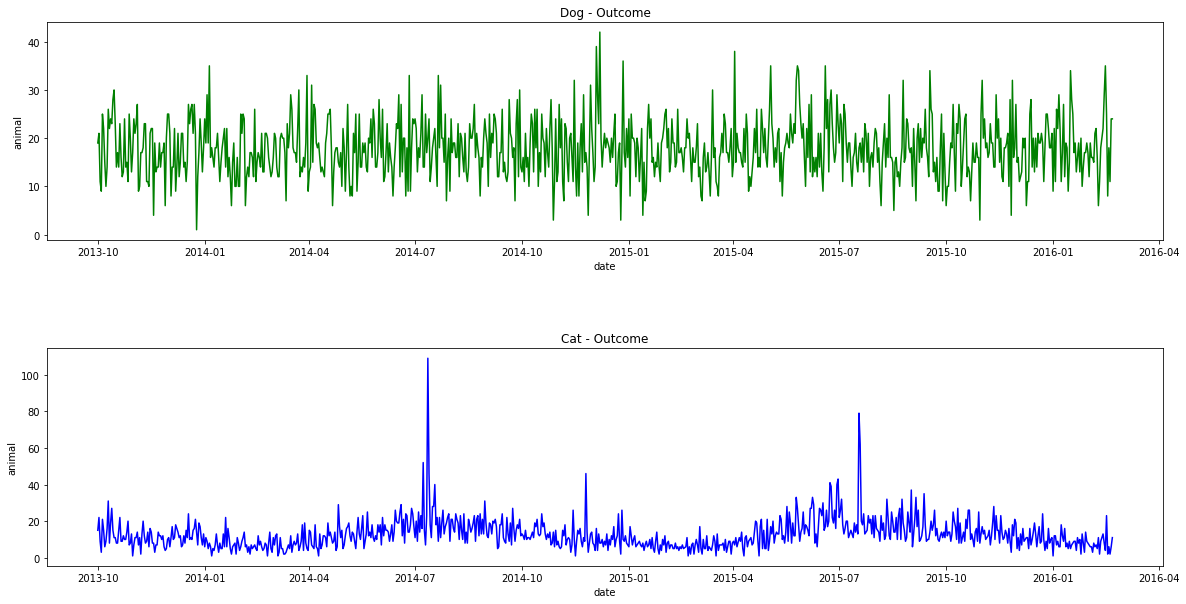

In [12]:
x = data.groupby(['Outcomedate','AnimalType'])['AnimalID'].count().reset_index()
f, axes = plt.subplots(2,1, figsize = (20,10))
plt.subplots_adjust(hspace = 0.5)
axes[1].plot(x[x['AnimalType']=='Cat']['Outcomedate'], x[x['AnimalType']=='Cat']['AnimalID'],'b')
axes[1].set_xlabel('date')
axes[1].set_ylabel('animal')
axes[1].set_title('Cat - Outcome')
axes[0].plot(x[x['AnimalType']=='Dog']['Outcomedate'], x[x['AnimalType']=='Dog']['AnimalID'],'g')
axes[0].set_xlabel('date')
axes[0].set_ylabel('animal')
axes[0].set_title('Dog - Outcome')

In [13]:
list = data['OutcomeDay'].unique().tolist()
list

['Evening', 'morning', 'Afternoon', 'Night']

Text(0.5,1,'Dog-OutcomeDay')

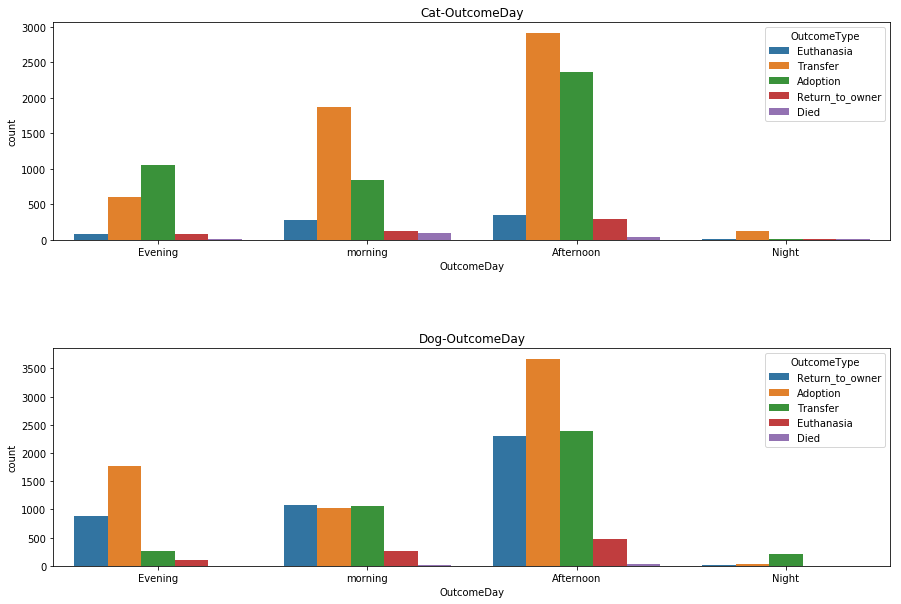

In [14]:
f, axes = plt.subplots(2, 1, figsize = (15,10))
plt.subplots_adjust(hspace = 0.5)
sns.countplot(x='OutcomeDay', hue='OutcomeType', data=data[data['AnimalType']=='Cat'],ax=axes[0], order=list)
axes[0].set_title('Cat-OutcomeDay')
sns.countplot(x='OutcomeDay', hue='OutcomeType', data=data[data['AnimalType']=='Dog'],ax=axes[1])
axes[1].set_title('Dog-OutcomeDay')

Text(0.5,1,'Dog')

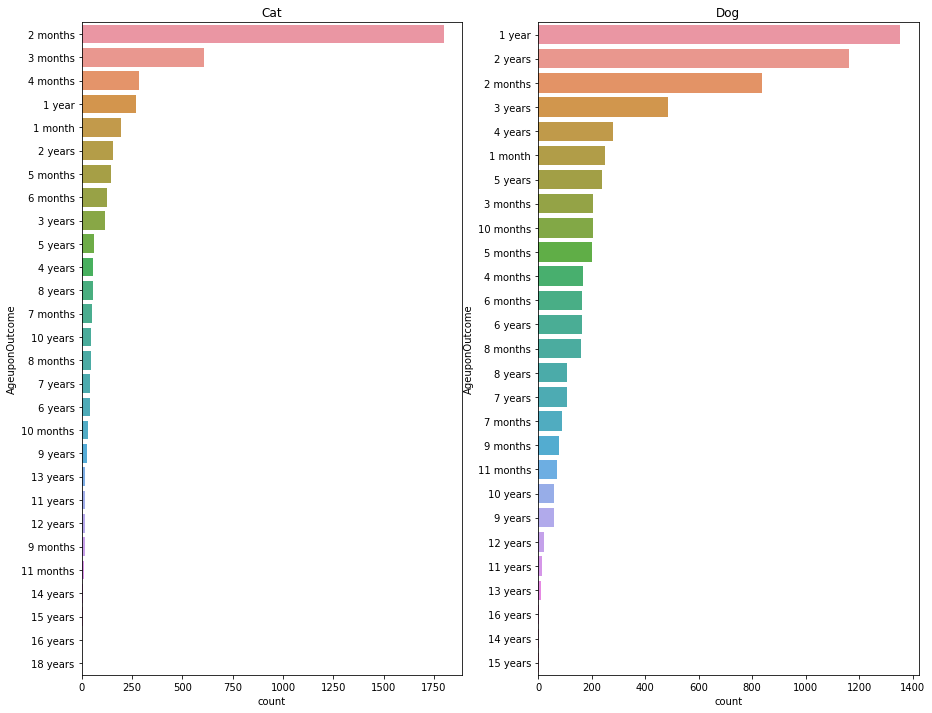

In [15]:
f, axes = plt.subplots(1, 2, figsize = (15,12))
listcat = data[(data['OutcomeType']=='Adoption')&(data['AnimalType']=='Cat')].groupby('AgeuponOutcome')['AnimalID'].count().sort_values(ascending=False).reset_index()
listdog = data[(data['OutcomeType']=='Adoption')&(data['AnimalType']=='Dog')].groupby('AgeuponOutcome')['AnimalID'].count().sort_values(ascending=False).reset_index()
sns.countplot(y='AgeuponOutcome', data=data[(data['OutcomeType']=='Adoption')&(data['AnimalType']=='Cat')], order=listcat['AgeuponOutcome'],ax=axes[0])
axes[0].set_title('Cat')
sns.countplot(y='AgeuponOutcome', data=data[(data['OutcomeType']=='Adoption')&(data['AnimalType']=='Dog')], order=listdog['AgeuponOutcome'],ax=axes[1])
axes[1].set_title('Dog')

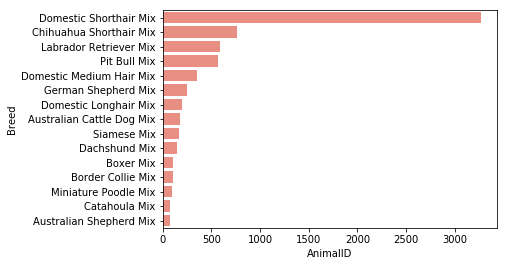

In [16]:
cattype = data.groupby(['Breed','OutcomeType'])['AnimalID'].count().sort_values(ascending=False).reset_index()
cattype = cattype[cattype['OutcomeType']=='Adoption'].head(15)
sns.barplot(x='AnimalID',y='Breed', data=cattype, color="salmon")

Text(0.5,1,'SexuponOutcome - Died')

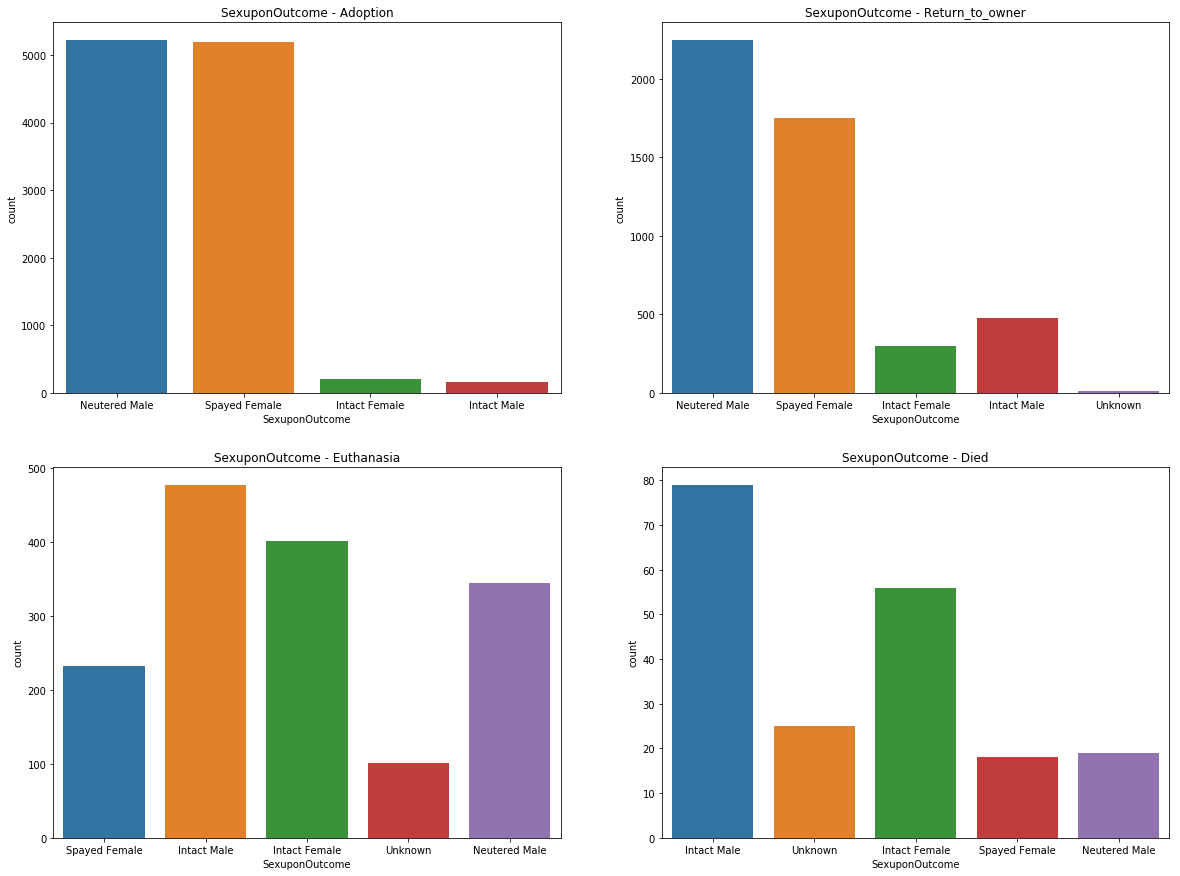

In [17]:
f, axes = plt.subplots(2, 2, figsize = (20,15))
sns.countplot(x='SexuponOutcome', data=data[data['OutcomeType']=='Adoption'], ax=axes[0,0])
axes[0,0].set_title('SexuponOutcome - Adoption')
sns.countplot(x='SexuponOutcome', data=data[data['OutcomeType']=='Return_to_owner'], ax=axes[0,1])
axes[0,1].set_title('SexuponOutcome - Return_to_owner')
sns.countplot(x='SexuponOutcome', data=data[data['OutcomeType']=='Euthanasia'], ax=axes[1,0])
axes[1,0].set_title('SexuponOutcome - Euthanasia')
sns.countplot(x='SexuponOutcome', data=data[data['OutcomeType']=='Died'], ax=axes[1,1])
axes[1,1].set_title('SexuponOutcome - Died')

In [18]:
data

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Outcomedate,OutcomeHour,OutcomeWeekday,OutcomeDay
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,2014-02-12,18,2,Evening
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,2013-10-13,12,6,morning
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,2015-01-31,12,5,morning
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,2014-07-11,19,4,Evening
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,2013-11-15,12,4,morning
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan,2014-04-25,13,4,Afternoon
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby,2015-03-28,13,5,Afternoon
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby,2015-04-30,17,3,Afternoon
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White,2014-02-04,17,1,Afternoon
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White,2014-05-03,7,5,morning


In [19]:
data['OutcomeSubtype'].fillna('0', inplace=True)

In [41]:
data['SexuponOutcome'].isnull().value_counts()

False    26728
True         1
Name: SexuponOutcome, dtype: int64

fill na with Zore

In [58]:
le = LabelEncoder()
data['OutcomeType'] = le.fit_transform(data['OutcomeType'])
data['OutcomeSubtype'] = le.fit_transform(data['OutcomeSubtype'].fillna('0'))
data['AnimalType'] = le.fit_transform(data['AnimalType'])
data['SexuponOutcome'] = le.fit_transform(data['SexuponOutcome'].fillna('0'))
data['AgeuponOutcome'] = le.fit_transform(data['AgeuponOutcome'].fillna('0'))
data['Breed'] = le.fit_transform(data['Breed'])
data['Color'] = le.fit_transform(data['Color'])
data['OutcomeDay'] = le.fit_transform(data['OutcomeDay'])
data['OutcomeWeekday'] = le.fit_transform(data['OutcomeWeekday'])
data['OutcomeHour'] = le.fit_transform(data['OutcomeHour'])
# data['OutcomeType'] = le.fit_transform(data['OutcomeType'])

In [59]:
data

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Outcomedate,OutcomeHour,OutcomeWeekday,OutcomeDay
0,A671945,Hambone,2014-02-12 18:22:00,3,0,1,3,6,1221,130,2014-02-12,14,2,1
1,A656520,Emily,2013-10-13 12:44:00,2,16,0,4,6,640,167,2013-10-13,8,6,3
2,A686464,Pearce,2015-01-31 12:28:00,0,7,1,3,22,1066,86,2015-01-31,8,5,3
3,A683430,NaN,2014-07-11 19:09:00,4,13,0,2,26,640,42,2014-07-11,15,4,1
4,A667013,NaN,2013-11-15 12:52:00,4,13,1,3,22,914,274,2013-11-15,8,4,3
5,A677334,Elsa,2014-04-25 13:04:00,4,13,1,1,3,369,36,2014-04-25,9,4,0
6,A699218,Jimmy,2015-03-28 13:11:00,4,13,0,2,26,640,63,2015-03-28,9,5,0
7,A701489,NaN,2015-04-30 17:02:00,4,13,0,5,26,640,104,2015-04-30,13,3,0
8,A671784,Lucy,2014-02-04 17:17:00,0,0,1,4,33,45,250,2014-02-04,13,1,0
9,A677747,NaN,2014-05-03 07:48:00,0,12,1,4,6,364,318,2014-05-03,3,5,3


In [61]:
fiture = data.drop(['AnimalID','Name','DateTime','OutcomeType','Outcomedate'],axis=1)
target = data['OutcomeType']

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, f1_score

In [63]:
X_train, X_test, y_train, y_test = train_test_split(fiture,target, test_size=0.3)

In [64]:
sm_after = SMOTE(random_state=13)
X_sm, y_sm = sm_after.fit_sample(X_train, y_train)

In [74]:
data_acc = {'accuracy': [], 'algo': [], 'f1-score': []}

# Decision Tree

In [67]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
predict_tree = tree.predict(X_test)

In [72]:
acc = accuracy_score(y_pred = predict_tree, y_true = y_test)
f1score = np.mean(f1_score(y_pred = predict_tree, y_true=y_test,  average=None))

In [75]:
data_acc['accuracy'].append(acc)
data_acc['f1-score'].append(f1score)
data_acc['algo'].append('Tree')

## Multinomial Naive Bayes

In [77]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
predict_mnb = mnb.predict(X_test)

In [78]:
acc = accuracy_score(y_pred = predict_mnb, y_true = y_test)
f1score = np.mean(f1_score(y_pred = predict_mnb, y_true=y_test,  average=None))

In [79]:
data_acc['accuracy'].append(acc)
data_acc['f1-score'].append(f1score)
data_acc['algo'].append('mnb')

## Random Forest

In [81]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
predict_rfc = rfc.predict(X_test)

/Users/admajaputra/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [82]:
acc = accuracy_score(y_pred = predict_rfc, y_true = y_test)
f1score = np.mean(f1_score(y_pred = predict_rfc, y_true=y_test,  average=None))

In [83]:
data_acc['accuracy'].append(acc)
data_acc['f1-score'].append(f1score)
data_acc['algo'].append('rfc')

In [85]:
data_acc

{'accuracy': [0.8274099014839755, 0.46851228332709816, 0.8454919566030678],
 'algo': ['Tree', 'mnb', 'rfc'],
 'f1-score': [0.8394241072119402, 0.3515216015411563, 0.8352531742650777]}

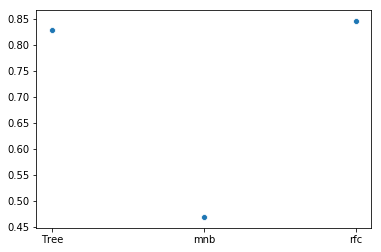

In [88]:
sns.scatterplot(x = data_acc['algo'], y = data_acc['accuracy'])

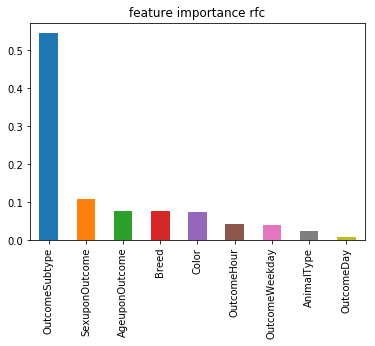

In [89]:
coef1 = pd.Series(rfc.feature_importances_, fiture.columns).sort_values(ascending=False)
coef1.plot(kind='bar', title='feature importance rfc')